In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn

In [25]:
%run import_data.ipynb

Dataset books.csv loaded successfully
isbn column dropped, isbn13 column kept
Language codes eng, en-US, en-GB, en-CA unified to 'en'
Missing publication dates filled in
2nd (large) dataset is being loaded...
Pandas dataframes (books_df, books_big, users, ratings) loaded successfully
Columns renamed and dates converted to dtype: datetime
replacing author fetching errors and missing values with NA
dataframe books copied from books_big for ease of use
replacing genre fetching errors with NA
missing values in books dataframe turned into pd.NA for more accurate analysis
Ready to go!


In [26]:
# Running the repo files for the very first time? use this instead:
# %run import_data_first_time.ipynb

In [27]:
books_big.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
0,590085417,Heidi,Johanna Spyri,2021,Scholastic,http://images.amazon.com/images/P/0590085417.0...,http://images.amazon.com/images/P/0590085417.0...,http://images.amazon.com/images/P/0590085417.0...,"Johanna Spyri, Shirley Temple, Movie tie-in, C..."
1,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,
2,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020,Bausch & Lombard,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...,American Fantasy poetry
3,307124533,Owl's Amazing but True No. 2,Owl Magazine,2012,Golden Books,http://images.amazon.com/images/P/0307124533.0...,http://images.amazon.com/images/P/0307124533.0...,http://images.amazon.com/images/P/0307124533.0...,
4,380816792,A Rose in Winter,Kathleen E. Woodiwiss,2011,Harper Mass Market Paperbacks,http://images.amazon.com/images/P/0380816792.0...,http://images.amazon.com/images/P/0380816792.0...,http://images.amazon.com/images/P/0380816792.0...,"Fiction, Historical Fiction, Romance, Fiction,..."


In [28]:
users

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [29]:
ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [30]:
ratings['book_rating'].value_counts()

book_rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [31]:
print(books_big.shape)
print(users.shape)
print(ratings.shape)

(226493, 9)
(278858, 3)
(1149780, 3)


In [32]:
books_big.isnull().sum()

isbn                     0
book_title               0
book_author            171
year_of_publication      0
publisher                0
image_url_s              0
image_url_m              0
image_url_l              0
genre                  903
dtype: int64

In [33]:
books_big.duplicated().sum()

0

In [34]:
books_big.isbn.duplicated().sum()

0

In [35]:
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [36]:
# Exclude missing values in age?
# Calculate the total number of rows
total_rows = len(users)

# Calculate the number of rows with missing values in the 'age' column
missing_age_rows = users['age'].isna().sum()

# Calculate the percentage of rows with missing values in the 'age' column
percentage_missing = (missing_age_rows / total_rows) * 100

print(f"Percentage of data that would be excluded: {percentage_missing:.2f}%")

# too many missing values, so we will not exclude them

Percentage of data that would be excluded: 39.72%


In [37]:
users.drop('age', axis=1, inplace=True)
users.head()

,user_id,location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [38]:
users.shape

(278858, 2)

In [39]:
users.duplicated().sum()

0

In [40]:
ratings.isnull().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

In [41]:
ratings.duplicated().sum()

0

In [42]:
print(books_big[books_big['book_author'].isnull()])

              isbn                                         book_title  \
268      687037026                            Book of Discipline 1984   
4945    1552854582                Five Roses: A Guide to Good Cooking   
5530     738702943  Llewellyn's 2003 Wicca Almanac: Spring 2003 to...   
8557     310933293  Compact Thinline Bible: New International Vers...   
14723    821354256           World Bank Atlas 2003 (World Bank Atlas)   
...            ...                                                ...   
207494   967686555  The Book of Mormon: Another Testament of Jesus...   
208345   814807518                      Homage to Yaacov Agam (Amiel)   
214288   696000652  Better Homes and Gardens Favorite Houseplants ...   
214977   696001756  Better Homes and Gardens Patchwork and Quiltin...   
218143   876639287  The Compleat Farmer: A Compendium of Do-It-You...   

       book_author  year_of_publication                     publisher  \
268           <NA>                 2004           

#### Replacing missing publishers: Tyrant Moon: publisher is NovelBooks, Finders Keepers: publisher is NovelBooks

In [43]:
print(books_big[books_big['publisher'].isnull()])

Empty DataFrame
Columns: [isbn, book_title, book_author, year_of_publication, publisher, image_url_s, image_url_m, image_url_l, genre]
Index: []


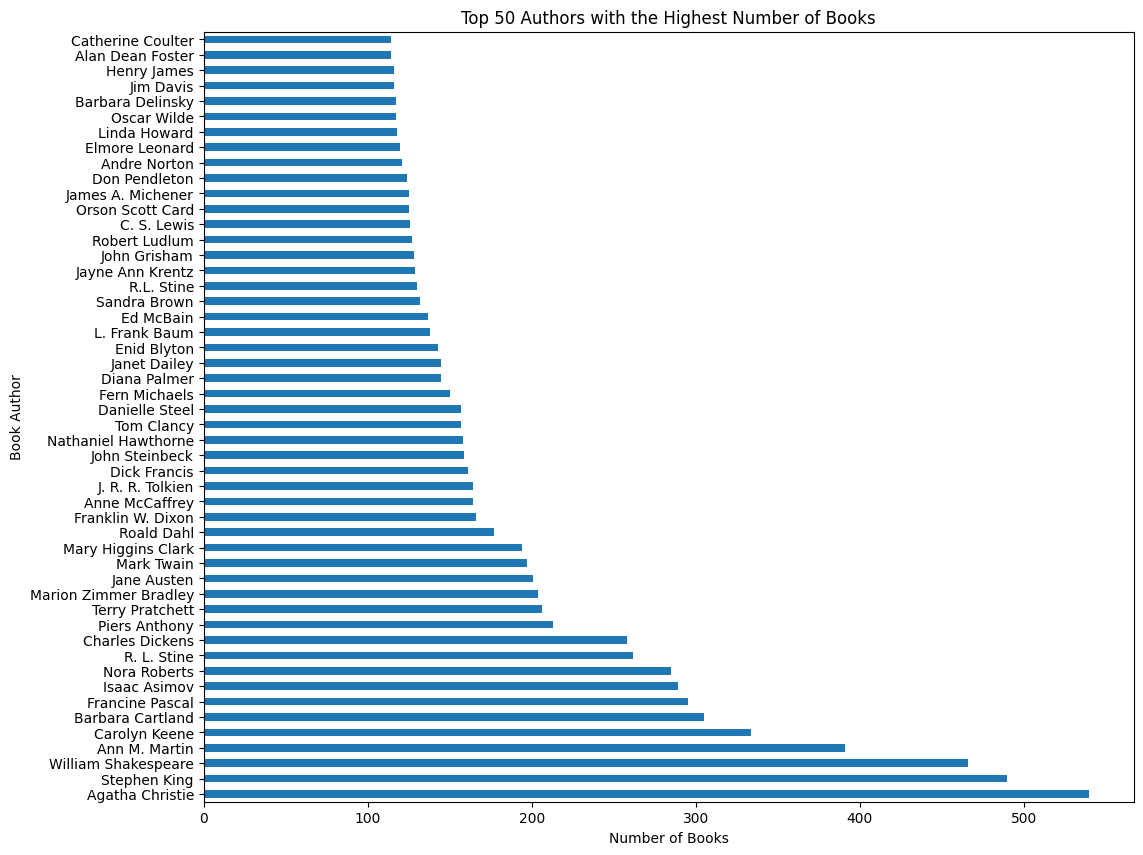

In [44]:
# Count the occurrences of each author and sort them in descending order
author_counts = books_big['book_author'].value_counts().head(50)

# Plot the top 25 authors with the highest number of books
author_counts.plot(kind='barh', figsize=(12, 10))
plt.xlabel('Number of Books')
plt.ylabel('Book Author')
plt.title('Top 50 Authors with the Highest Number of Books')
plt.show()

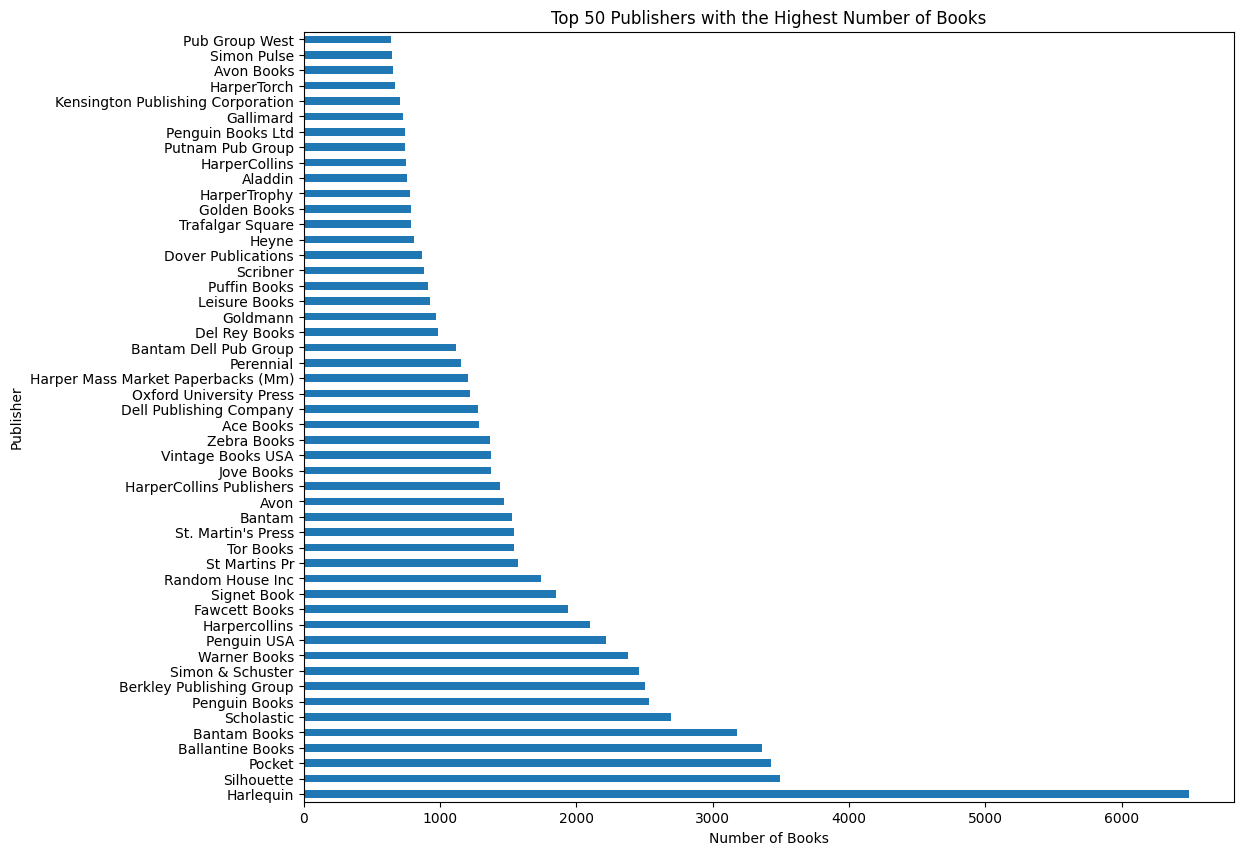

In [45]:
# Count the occurrences of each publisher and sort them in descending order
publication_counts = books_big['publisher'].value_counts().head(50)

# Plot the top 25 authors with the highest number of books
publication_counts.plot(kind='barh', figsize=(12, 10))
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.title('Top 50 Publishers with the Highest Number of Books')
plt.show()

<Axes: xlabel='year_of_publication'>

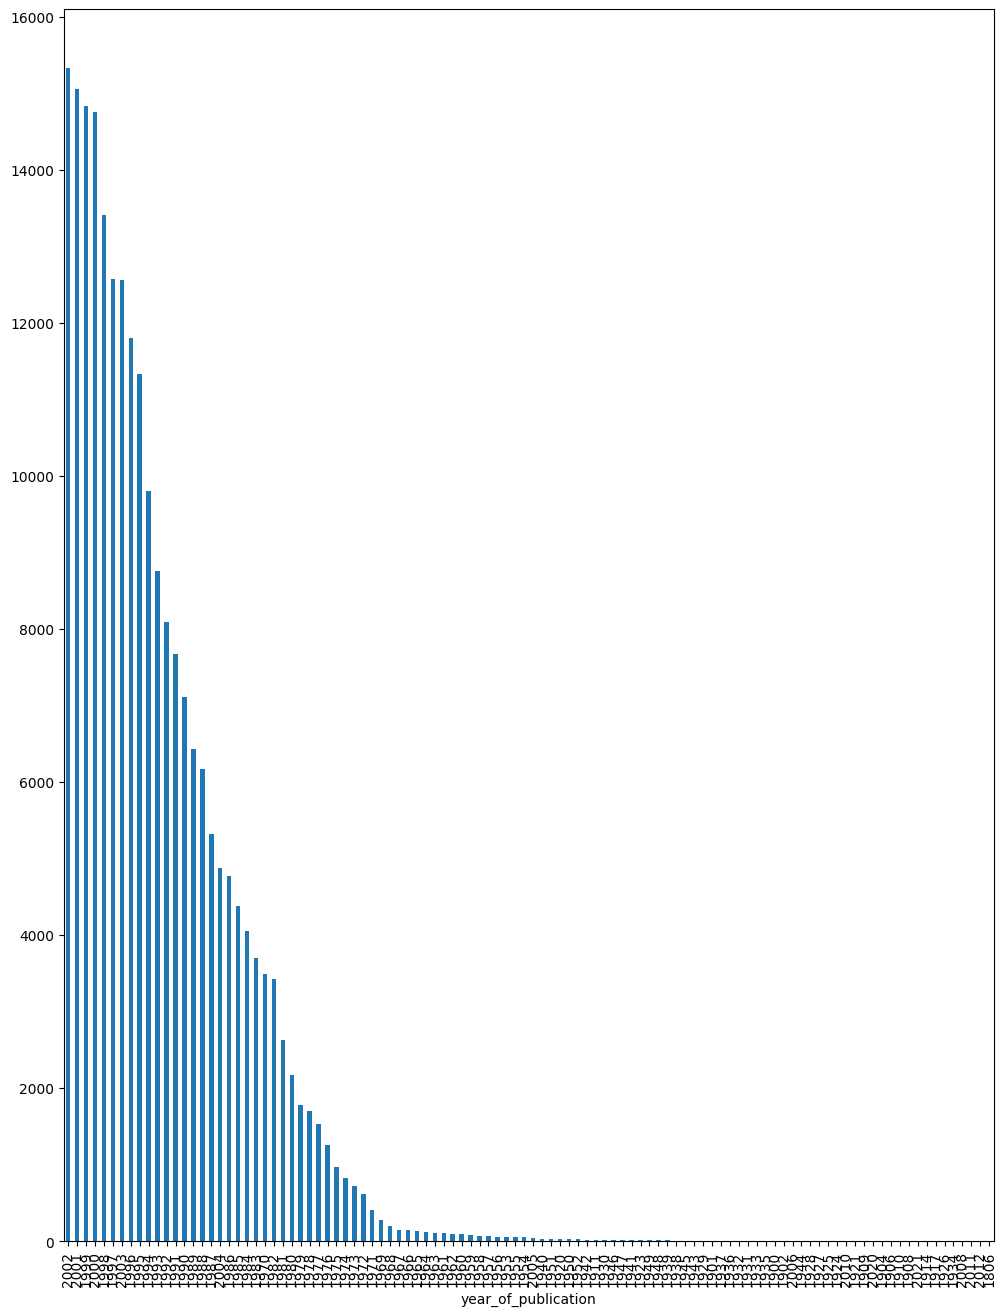

In [46]:
#plotting books per year
books_big['year_of_publication'].value_counts().plot(kind='bar', figsize=(12, 16))

In [47]:
# Susanne: what should we do with all the '0' years? 
# Lay: They're gone in the new dataset :)

In [48]:
#Average book ratings

# Merge ratings and books_big on 'isbn'
bookRating = pd.merge(ratings, books_big, on="isbn")

# Drop unnecessary columns
bookRating.drop(columns=['image_url_s', 'image_url_m', 'image_url_l'], inplace=True)

# Calculate the average rating for each book
averageRating = bookRating.groupby('isbn')['book_rating'].mean().round(1).reset_index()
averageRating.rename(columns={'book_rating': 'average_rating'}, inplace=True)

# Merge the average ratings back with the original dataset
averageRatingdf = pd.merge(bookRating, averageRating, on='isbn')

# Remove duplicate entries
averageRatingUnique = averageRatingdf[['isbn', 'average_rating']].drop_duplicates(subset=['isbn'])

# Merge the cleaned dataset with the original books dataset
ratingBooks = pd.merge(books_big, averageRatingUnique, on='isbn', how='inner')

# Optional: If you need another DataFrame with books and their average ratings
books_with_rating = pd.merge(books_big, averageRatingUnique, on='isbn')

In [49]:
books_with_rating.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre,average_rating
0,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,,1.4
1,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020,Bausch & Lombard,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...,American Fantasy poetry,8.0
2,074349346X,Angels & Demons : A Novel,Dan Brown,2008,Washington Square Press,http://images.amazon.com/images/P/074349346X.0...,http://images.amazon.com/images/P/074349346X.0...,http://images.amazon.com/images/P/074349346X.0...,"heparin, ambigrams, antimatter, Freemasons, Sw...",0.0
3,1903436346,The Winter's Tale - Arden Shakespeare : Third ...,John Pitcher,2006,Arden,http://images.amazon.com/images/P/1903436346.0...,http://images.amazon.com/images/P/1903436346.0...,http://images.amazon.com/images/P/1903436346.0...,"Drama, Kings and rulers, Married people, Casta...",9.0
4,1593100175,Beauty Is Soul Deep,Michelle Lee,2005,Barbour Publishing,http://images.amazon.com/images/P/1593100175.0...,http://images.amazon.com/images/P/1593100175.0...,http://images.amazon.com/images/P/1593100175.0...,"Religious life, Conduct of life, Teenage girls...",0.0


In [50]:
books_with_rating[books_with_rating['average_rating']==10.0].describe()

,year_of_publication,average_rating
count,3422.000000,3422.0
mean,1996.856224,10.0
std,7.525447,0.0
min,1904.000000,10.0
25%,1995.000000,10.0
50%,1999.000000,10.0
75%,2002.000000,10.0
max,2004.000000,10.0


<Axes: xlabel='average_rating'>

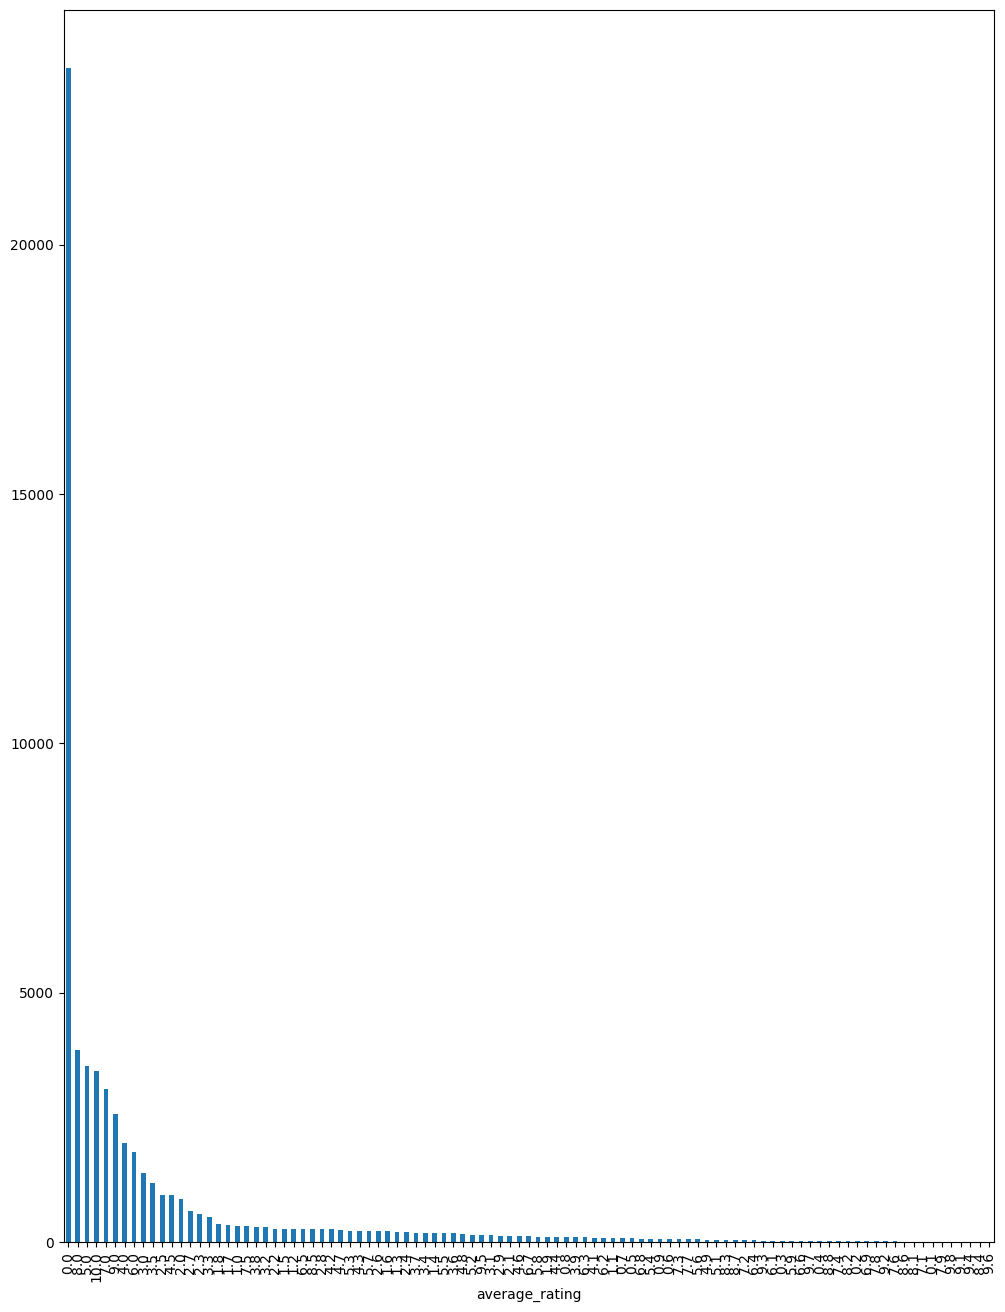

In [51]:
#plot number of books with their average ratings
books_with_rating['average_rating'].value_counts().plot(kind='bar', figsize=(12, 16))

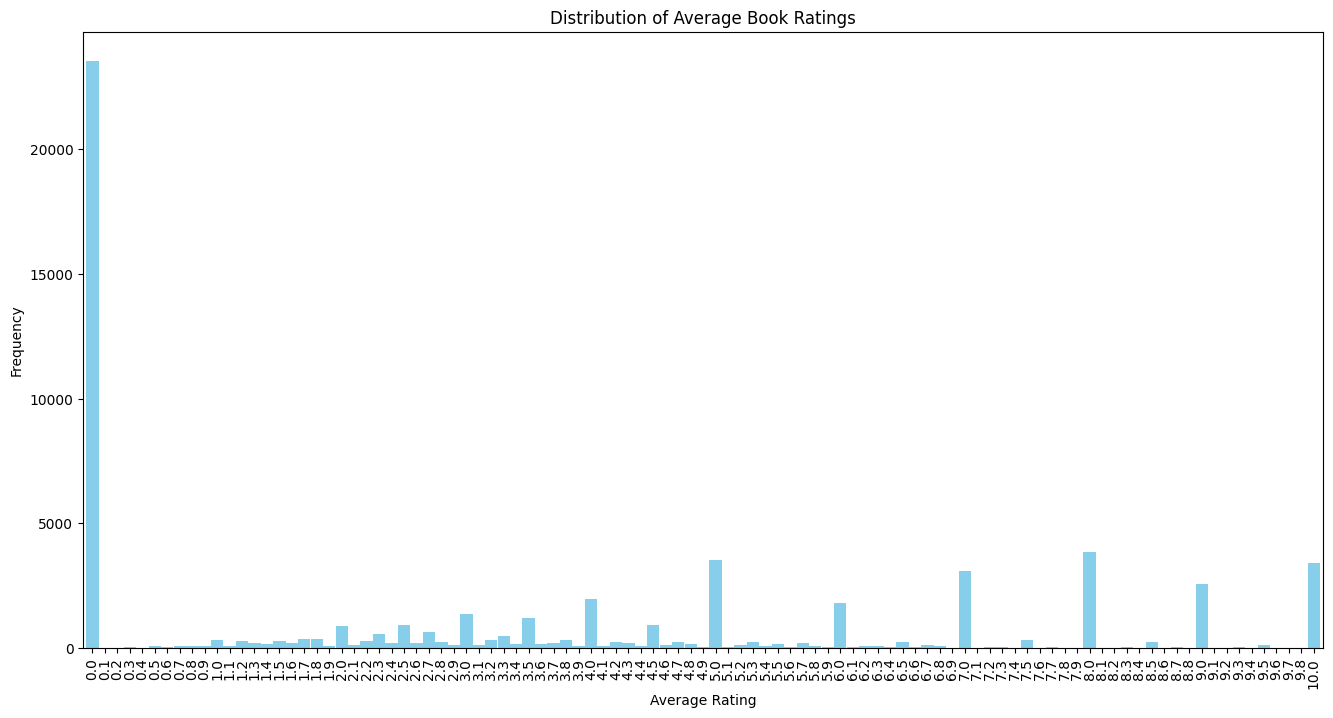

In [52]:
import matplotlib.pyplot as plt

# Get the value counts and sort them by index (rating)
rating_counts = books_with_rating['average_rating'].value_counts().sort_index()

# Plot the sorted value counts with broader bars and additional customizations
rating_counts.plot(
    kind='bar', 
    figsize=(16, 8),  # Adjust the figure size for better spacing
    width=0.99,  # Adjust the width of the bars for better spacing
    color='skyblue'  # Customize the color of the bars
)

# Add title and labels
plt.title('Distribution of Average Book Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

# Set the x-axis labels to be the sorted ratings
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

<Axes: ylabel='book_title'>

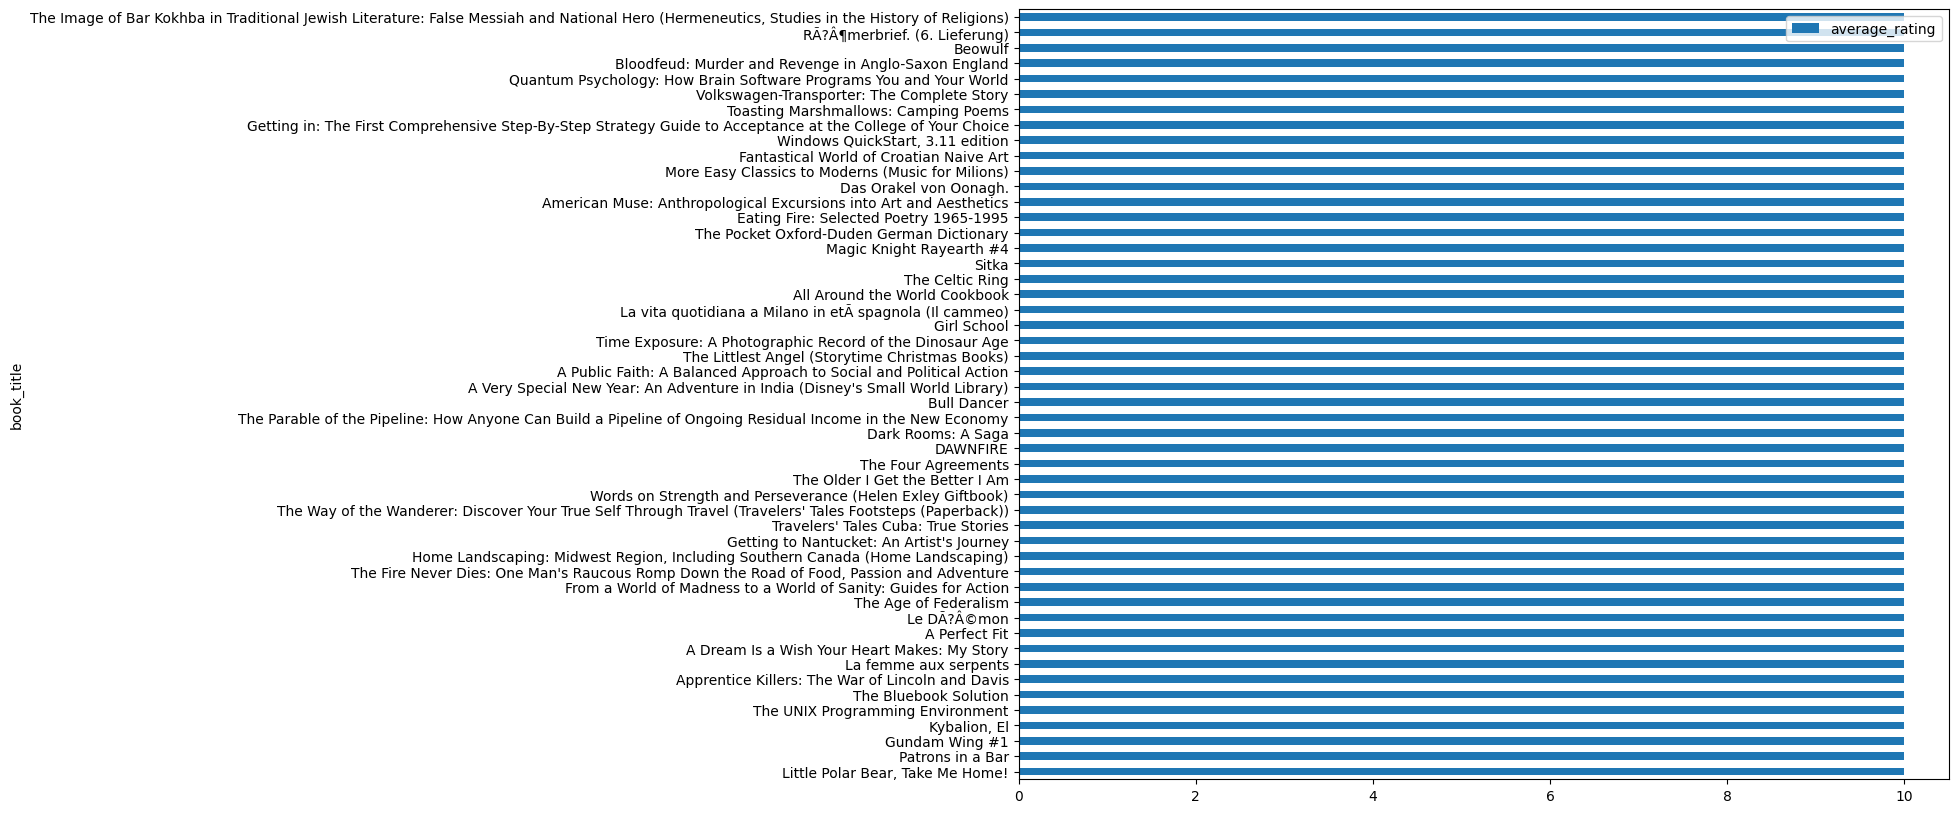

In [53]:
# plot book titles with highest ratings
books_with_rating.sort_values('average_rating', ascending=False).head(50).plot(kind='barh', x='book_title', y='average_rating', figsize=(12, 10))